# Connectionist modelling workshop 
## Perceptron for Logical AND




In this worksheet we'll build a tiny neural network to learn the *logical AND* problem.

### Preparing the code and data

**Run the following cell.** Please don't modify the code in this cell. This will initialise a lot of functions, and you don't have to care about these if you're a beginner, but in case someone knows python they should be able to see how this is written.

For background though, the first two lines starting with `import` provide access to the existing python libraries `random`, `numpy` and `matplotlib.pyplot` which contain functions relating to randomisation, numeric calculations, and plotting, respectively. Every time we "import a library" like this, it's similar to including all these functions in our code.

The statements beginning with `def` define custom functions.

In [1]:
#CELL 1

import random
import numpy as np
import matplotlib.pyplot as plt


def logical_AND_trainingdata():
    inputs=[[0,0],[0,1],[1,0],[1,1]]
    outputs=[0,0,0,1]
    trainingdata={}
    trainingdata['input']=inputs
    trainingdata['target']=outputs
    return trainingdata

def logical_OR_trainingdata():
    inputs=[[0,0],[0,1],[1,0],[1,1]]
    outputs=[0,1,1,1]
    trainingdata = {}
    trainingdata['input'] = inputs
    trainingdata['target'] = outputs
    return trainingdata

def logical_XOR_trainingdata():
    inputs=[[0,0],[0,1],[1,0],[1,1]]
    outputs=[0,1,1,0]
    trainingdata = {}
    trainingdata['input'] = inputs
    trainingdata['target'] = outputs
    return trainingdata

def propagate(input, weights):

    activation = weights[0] #weights[0] is bias

    for i in range(len(input)):
        activation += weights[i+1] * input[i]


    if activation > 0.0:
        return 1.0
    else:
        return 0.0

def get_error(target, actual_output):

    error=float(target)-actual_output
    return error

def weight_update(weights,input, learningrate, error):
    weights[0]=weights[0]+learningrate*error #bias
    for i in range(len(weights)-1):
        weights[i+1]=weights[i+1]+learningrate*error*input[i]
    return weights

def training_step(perceptron,index):
    trainingdata = perceptron['trainingdata']
    weights = perceptron['weights']
    learningrate = perceptron['learningrate']

    this_training_pattern_input = trainingdata['input'][index]

    this_training_pattern_target = trainingdata['target'][index]

    actual_output=propagate(this_training_pattern_input,weights)

    error=get_error(this_training_pattern_target, actual_output)

    weights=weight_update(weights, this_training_pattern_input, learningrate, error)

    perceptron['weights']=weights


    return perceptron, error



def training_step_detailed(perceptron,index):
    trainingdata = perceptron['trainingdata']
    weights = perceptron['weights']
    learningrate = perceptron['learningrate']

    this_training_pattern_input = trainingdata['input'][index]
    print('input:'+str(this_training_pattern_input))
    this_training_pattern_target = trainingdata['target'][index]
    print('target:'+str(this_training_pattern_target))
    actual_output=propagate(this_training_pattern_input,weights)
    print('actual output:'+str(actual_output))
    error=get_error(this_training_pattern_target, actual_output)
    print('error:'+str(error))
    if abs(error)>0:
        print('error, change weights!')
    else:
        print('correct, no need to change weights')
    print('old weights:'+str([round(w,2) for w in weights]))
    weights=weight_update(weights, this_training_pattern_input, learningrate, error)
    print('new weights:'+str([round(w,2) for w in weights]))
    perceptron['weights']=weights
    visualise_perceptron(perceptron)

    return perceptron, error



def visualise_perceptron(p):
    plt.axes()
    tdinput=p['trainingdata']['input']
    circle1 = plt.Circle((tdinput[0][0], tdinput[0][1]), radius=.05, fc='r')
    circle2 = plt.Circle((tdinput[1][0], tdinput[1][1]), radius=.05, fc='r')
    circle3 = plt.Circle((tdinput[2][0], tdinput[2][1]), radius=.05, fc='r')
    circle4 = plt.Circle((tdinput[3][0], tdinput[3][1]), radius=.05, fc='r')
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.gca().add_patch(circle4)

    b=p['weights'][0]
    w1=p['weights'][1]
    w2=p['weights'][2]
    
    
    a1 = -0.1
    a2 = -0.1*(-(b/w2) / (b/w1)) + (-b / w2)
    b1 = 1.1
    b2= 1.1*(-(b / w2) / (b / w1)) + (-b / w2)
    
    line = plt.Line2D((a1,a2), (b1,b2), lw=2.5)
    plt.gca().add_line(line)
    plt.axis([-.1,1.1,-.1,1.1])
    plt.show()
    return
    

def display_perceptron_parameters(p):
    tdinput=p['trainingdata']['input']
    print('number of input units:'+str(len(tdinput[0])))
    print('number of output units: 1')
    print('bias:'+str(np.round(p['weights'][0],2)))
    print('weights:'+str([np.round(w,2) for w in p['weights'][1:]]))
    


def initialise_perceptron(trainingdata, learningrate):
    input=trainingdata['input']
    target = trainingdata['target']
    n_exemplars=len(input)
    n_input_units=len(input[0])
    weights=[]
    for i in range(n_input_units+1): #+1 for bias
        weights.append(random.random())
    #print('starting weights:'+str([round(w,2) for w in weights[1:]]))
    #weights=[-.5,.4, .6]# for testing
    perceptron={}
    perceptron['trainingdata']=trainingdata
    perceptron['weights']=weights
    perceptron['learningrate']= learningrate

    return perceptron

The following cell will load the logical-AND training data, and it displays all the patterns in the set. **Run this cell.**

In [2]:
#CELL 2

#load the training data
TrainingData=logical_AND_trainingdata()

#display input and target values for each pattern
for i in range(len(TrainingData['input'])):
    print("input"+str(TrainingData['input'][i])+'-- target:'+str(TrainingData['target'][i]))

input[0, 0]-- target:0
input[0, 1]-- target:0
input[1, 0]-- target:0
input[1, 1]-- target:1


The following cell will initialise a small network, with four units (2 input - "x","y", 1 output "z", and bias "b" as discussed in class) and weights on the 2 connections between x and z and between y and z, as well as between the bias and the output. Note it's using the functions we defined further up in order to do so. We are also setting the learning rate to 0.1 .  **Run this cell.**

In [3]:
#CELL 3

#define a variable for the learning rate
lr=.1

#initialise a perceptron called "ANDperceptron"
ANDperceptron=initialise_perceptron(TrainingData, lr)

#display the values in the perceptron
display_perceptron_parameters(ANDperceptron)

number of input units:2
number of output units: 1
bias:0.77
weights:[0.71, 0.25]


This previous cell contained calls to funtions that use randomisation. This is because we want every instance of a network to be slightly different. Some initial settings are going to be closer to a good solution, and some are going to be worse. 
Ignore the bit that says "bias" for now.
**Run the same cell again and watch the values change.**
***

### Training a network

Now let's train the network. Because we know (from Rosenblatt's work) that perceptrons always converge for linearly separable problems like AND (i.e. the error will go down to 0), we set this up to run until error=0 over the whole training set is reached, i.e. the network gets all patterns correct. Presenting the whole training set once is called an "epoch", so we are watching for the error for an epoch to reach 0.
The following cell runs one entire training run for this network. **Run the cell now.**

In [4]:
#CELL 4

epoch_e=np.nan  #set up a variable to log the combined epoch error
epoch_count=0 #set up a variable to count epochs
while epoch_e!=0.0:  #a while-loop: keep iterating the following, until the epoch error is 0
    epoch_count=epoch_count+1  #increase the epoch counter
    e=[]   #initialise an empty list to hold the error for each training pattern in this epoch
    seq=[0,1,2,3]
    shuffleseq=np.random.permutation(seq)  #randomise the presentation order for this epoch

    for j in range(4):  #a for-loop: do the following 4 times, i.e. for each training pattern
        [ANDperceptron,e0]=training_step(ANDperceptron,shuffleseq[j]) #run one training step
        e.append(e0) #append the error for this pattern at the end of the list of errors
    epoch_e=np.sum([abs(err) for err in e]) #sum up errors for all patterns in this epoch

    print('epoch'+str(epoch_count)+' error:'+str(epoch_e))


epoch1 error:3.0
epoch2 error:3.0
epoch3 error:3.0
epoch4 error:1.0
epoch5 error:1.0
epoch6 error:1.0
epoch7 error:1.0
epoch8 error:1.0
epoch9 error:1.0
epoch10 error:0.0


Train the network a few times. To do this:<br>
**Re-run the cell that initialises the network (No. 3)**<br>
then<br>
**Re-run the cell that trains the network (No. 4)**<br>
***
**Task 1**: Does the error decrease the same way every time? Is it sometimes faster/less fast?<br>

Why is that the case? Let's break it down.  The following cell initialises a network, and the one below runs one training step, but with a bit more information about each step. This time it's your turn to run each training step - run the cell multiple times, until you get error = 0. Each time you should change the value of the variable i, to either 0,1,2 or 3, to select one of the training values.

Setting
`i = 0` will pick the (0,0) training pattern<br>
`i = 1` will pick the (0,1) training pattern<br>
`i = 2` will pick the (1,0) training pattern<br>
`i = 3` will pick the (1,1) training pattern<br>

Note that it is your job to make sure every pattern gets presented equally often - you may want to keep track on a piece of paper!<br>
**Task 2:** Use the next two cells (No. 5 and 6) to log training in detail. What does the plot show?<br>
Hint: if you can't see a separating line, either try running the cell a few times, or re-initialise the network until you get a "better" initial setting.

In [17]:
#CELL 5

#define a variable for the learning rate
lr=.1

#initialise a perceptron called "ANDperceptron"
ANDperceptron=initialise_perceptron(TrainingData, lr)

#display the values in the perceptron
display_perceptron_parameters(ANDperceptron)

number of input units:2
number of output units: 1
bias:0.51
weights:[0.05, 0.78]


input:[0, 0]
target:0
actual output:0.0
error:0.0
correct, no need to change weights
old weights:[-0.09, 0.53, 0.62]
new weights:[-0.09, 0.53, 0.62]


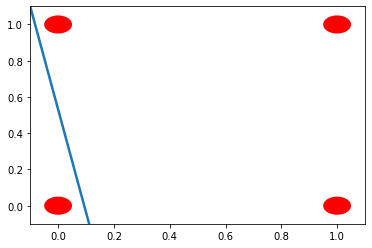

error:0.0


In [28]:
#CELL 6

i = 0 #INSERT TO THE LEFT a number between 0 and 3 to select the training pattern
[ANDperceptron,e]=training_step_detailed(ANDperceptron,i)
print('error:'+str(abs(e)))

Observe how the weights change over training, and that they are only adjusted when there is an error for a pattern.
***

### The role of the learning rate

Now, let's consider the role of the learning rate. This represents the amount by which weights are changed on every round. In this task, you should try to systematically observe how changing the learning rate affects how fast/slowly the network can learn.
The following cell initialises a network and then runs training (just like above). Run it multiple times, and adjust the learning parameter where indicated. You should try a parameter range starting at .001, via .01, to .1 (what we've been using so far), .2, .3 (or more values if you like.
Keep track of the number of epochs it takes your network to reach epoch error=0 (e.g. on a piece of paper). What's the best value? Is this robust (i.e. if you run it again with the same learning rate, do you get the same result? <br>
**Task 3:** Run this cell multiple times and adjust the code to change the learning rate.

In [19]:
#CELL 7

#define a variable for the learning rate
lr=   .2 #INSERT TO THE LEFT a value for the learning rate

#initialise a perceptron called "ANDperceptron"
ANDperceptron=initialise_perceptron(TrainingData, lr)

#display the values in the perceptron
display_perceptron_parameters(ANDperceptron)


epoch_e=np.nan  #set up a variable to log the combined epoch error
epoch_count=0 #set up a variable to count epochs
while epoch_e!=0.0:  #a while-loop: keep iterating the following, until the epoch error is 0
    epoch_count=epoch_count+1  #increase the epoch counter
    e=[]   #initialise an empty list to hold the error for each training pattern in this epoch
    seq=[0,1,2,3]
    shuffleseq=np.random.permutation(seq)  #randomise the presentation order for this epoch

    for j in range(4):  #a for-loop: do the following 4 times, i.e. for each training pattern
        [ANDperceptron,e0]=training_step(ANDperceptron,shuffleseq[j]) #run one training step
        e.append(e0) #append the error for this pattern at the end of the list of errors
    epoch_e=np.sum([abs(err) for err in e]) #sum up errors for all patterns in this epoch

    print('epoch'+str(epoch_count)+' error:'+str(epoch_e))


number of input units:2
number of output units: 1
bias:0.9
weights:[0.72, 0.66]
epoch1 error:3.0
epoch2 error:3.0
epoch3 error:1.0
epoch4 error:2.0
epoch5 error:0.0


### Learning different logical functions

Logical AND isn't the only tiny network we could run --- we can use the exact same network for the logical OR network (where the output unit is meant to "fire" as soon as at least 1 input is "on", i.e. output 1 for (0,1), (1,0) and (1,1) and output 0 only for (0,0).

The following cell loads the OR training set, initialises a network, and trains it. <br>
**Task 4:** Run this a few times. How does training compare to the AND network?

In [20]:
#CELL 8

TrainingData=logical_OR_trainingdata()

#display input and target values for each pattern
for i in range(len(TrainingData['input'])):
    print("input"+str(TrainingData['input'][i])+'-- target:'+str(TrainingData['target'][i]))

#define a variable for the learning rate
lr=.1   

#initialise a perceptron called "ANDperceptron"
ANDperceptron=initialise_perceptron(TrainingData, lr)

#display the values in the perceptron
display_perceptron_parameters(ANDperceptron)

print('----start training----')

epoch_e=np.nan  #set up a variable to log the combined epoch error
epoch_count=0 #set up a variable to count epochs
while epoch_e!=0.0:  #a while-loop: keep iterating the following, until the epoch error is 0
    epoch_count=epoch_count+1  #increase the epoch counter
    e=[]   #initialise an empty list to hold the error for each training pattern in this epoch
    seq=[0,1,2,3]
    shuffleseq=np.random.permutation(seq)  #randomise the presentation order for this epoch

    for j in range(4):  #a for-loop: do the following 4 times, i.e. for each training pattern
        [ANDperceptron,e0]=training_step(ANDperceptron,shuffleseq[j]) #run one training step
        e.append(e0) #append the error for this pattern at the end of the list of errors
    epoch_e=np.sum([abs(err) for err in e]) #sum up errors for all patterns in this epoch

    print('epoch'+str(epoch_count)+' error:'+str(epoch_e))

input[0, 0]-- target:0
input[0, 1]-- target:1
input[1, 0]-- target:1
input[1, 1]-- target:1
number of input units:2
number of output units: 1
bias:0.21
weights:[0.53, 0.62]
----start training----
epoch1 error:1.0
epoch2 error:1.0
epoch3 error:1.0
epoch4 error:0.0


***
Finally, let's try this with XOR (exclusive or), where the output unit is meant to "fire" if exactly one input is "on", i.e. output 1 for (0,1) and (1,0) but output 0 for (1,1) and (0,0).

WARNING: Wait for the rest of the class to press the button on this one. It could disrupt your computer for a very long time. If you need to stop the process, click on "Kernel" --> "Interrupt" in the menu.

Why does it not stop training?
The answer is, we told python to keep repeating the procedure until the error is 0. This is never reached. As Minsky and Papert showed in their famous book in 1969, perceptrons can only handle a small class of problems, the so-called linearly-separable problems. XOR is not linearly separable, so the network can never completely reduce the error.

Next week, we'll therefore work with the more powerful neural networks that contain a hidden layer!


In [ ]:
TrainingData=logical_XOR_trainingdata()

#display input and target values for each pattern
for i in range(len(TrainingData['input'])):
    print("input"+str(TrainingData['input'][i])+'-- target:'+str(TrainingData['target'][i]))

#define a variable for the learning rate
lr=.1   

#initialise a perceptron called "ANDperceptron"
ANDperceptron=initialise_perceptron(TrainingData, lr)

#display the values in the perceptron
display_perceptron_parameters(ANDperceptron)

print('----start training----')

epoch_e=np.nan  #set up a variable to log the combined epoch error
epoch_count=0 #set up a variable to count epochs
while epoch_e!=0.0:  #a while-loop: keep iterating the following, until the epoch error is 0
    epoch_count=epoch_count+1  #increase the epoch counter
    e=[]   #initialise an empty list to hold the error for each training pattern in this epoch
    seq=[0,1,2,3]
    shuffleseq=np.random.permutation(seq)  #randomise the presentation order for this epoch

    for j in range(4):  #a for-loop: do the following 4 times, i.e. for each training pattern
        [ANDperceptron,e0]=training_step(ANDperceptron,shuffleseq[j]) #run one training step
        e.append(e0) #append the error for this pattern at the end of the list of errors
    epoch_e=np.sum([abs(err) for err in e]) #sum up errors for all patterns in this epoch

    print('epoch'+str(epoch_count)+' error:'+str(epoch_e))

--------
Worksheet developed by Nadja Althaus.
Code adapted from https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/